
<h1 id='part1'>Project-1</h1>

I’m interested in the trends of the software engineering field in 2021. Here are three basic questions.

<p>Which Language will most people desire in 2021?
Which Database will most people desire in 2021?
Which Platform will most people desire in 2021?
</p>

The dataset I will use in this article for the answers from StackOverflow.
first, In order to get a better understanding of the data we will be looking at the dataset, let's take a look at some of the 
characteristics of the dataset.

<h2 id='part1'>Import dataset </h2>

In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('./data/survey_results_public.csv')
df.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


<h2 id='part1'>Overview the dataset</h2>

In [171]:
num_rows = df.shape[0] #Provide the number of rows in the dataset
num_cols = df.shape[1] #Provide the number of columns in the dataset
print("rows=",num_rows, "cols=",num_cols )
print("columns", df.columns.tolist())

rows= 64461 cols= 61
columns ['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq', 'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc', 'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith', 'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors', 'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith', 'MiscTechDesireNextYear', 'MiscTechWorkedWith', 'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps', 'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch', 'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms', 'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites', 'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear', 'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount', 'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength', 'Trans', 'UndergradMajor', 'WebframeDesireNextYear', 'WebframeWorkedWith', 'WelcomeChange', 'WorkWeekHrs', 'YearsCode', 'Ye

The result shows us There are 64461 rows and 61 columns in the dataset. There are 'LanguageDesireNextYear','PlatformDesireNextYear' and 'DatabaseWorkedWith' which could help me answer the previous questions.

In [172]:
desire_L = df.LanguageDesireNextYear.value_counts()#Provide a pandas series of the counts for each value
print(desire_L.head())

Python                            1152
Rust                               528
HTML/CSS;JavaScript;TypeScript     499
C#                                 461
Go                                 412
Name: LanguageDesireNextYear, dtype: int64


the top 5 values of "LanguageDesireNextYear":
Python 1152, Rust 528, HTML/CSS;JavaScript;TypeScript 499, C# 461, Go 412

The value is possible combination which should be splited. Then the follwing code works on spliting value, and add up the numbers of single value.

In [173]:
"""
init: dataset, column wihch need be splited, initial a dictionary
function: split the cabination categories and the store it in dic, the key of dic is single category. 
If the the category has aready in dic, add 1 on the value. 
"""

class helper():
    
    def __init__(self, column, dataframe):
        self.column = column
        self.dataframe = dataframe.dropna(subset = [self.column], how = "all")# Drop the rows with missing values 
        self.dic = {}
    
    def split_sum_value(self):
        self.dataframe.reset_index(drop=True,inplace=True)
        
        for i in range(self.dataframe.shape[0]): 
                
                temp_list = self.dataframe[self.column][i].split(";")# split combination value
                
                for j in range(len(temp_list)):
                    if temp_list[j] in self.dic:
                        self.dic[temp_list[j]] += 1
                    else:
                        self.dic[temp_list[j]] = 1
                        
        return self.dic

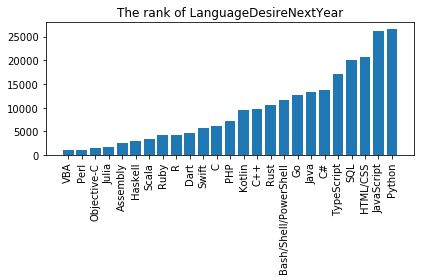

Which lauguage will most people desire in 2021? answer: Python


In [174]:
#creat a helper instance and call the split_sum_value() function
LanguageDesireNextYear_sum = helper("LanguageDesireNextYear", df)
dict_1 = LanguageDesireNextYear_sum.split_sum_value()
dict_1 = dict((sorted(dict_1.items(), key=lambda item: item[1])))

#creat bar chart
plt.bar(range(len(dict_1)), list(dict_1.values()), align='center')
plt.title("The rank of LanguageDesireNextYear")
plt.xticks(range(len(dict_1)), list(dict_1.keys()),rotation='vertical')
plt.tight_layout() #make room for the label.

#save figure and get the result
plt.savefig('The_rank_of_LanguageDesireNextYear.png')
plt.show()
print("Which lauguage will most people desire in 2021? answer:",max(dict_1, key=dict_1.get) )

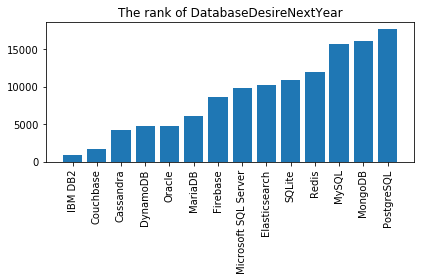

Which Database will most people desire in 2021? answer: PostgreSQL


In [175]:
#creat a helper instance and call the split_sum_value() function
DatabaseDesireNextYear_sum = helper("DatabaseDesireNextYear", df)
dict_2 = DatabaseDesireNextYear_sum.split_sum_value()
dict_2 = dict((sorted(dict_2.items(), key=lambda item: item[1])))

#creat bar chart
plt.bar(range(len(dict_2)), list(dict_2.values()), align='center')
plt.title("The rank of DatabaseDesireNextYear")
plt.xticks(range(len(dict_2)), list(dict_2.keys()),rotation='vertical')
plt.tight_layout()

#save figure and get the result
plt.savefig('The_rank_of_DatabaseDesireNextYear.png')
plt.show()
print("Which Database will most people desire in 2021? answer:",max(dict_2, key=dict_2.get) )

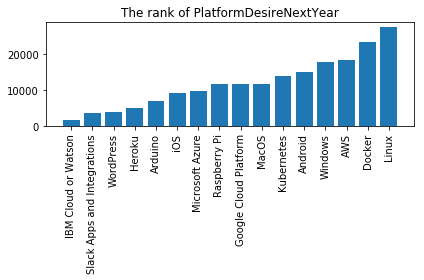

Which Platform will most people desire in 2021? answer: Linux


In [176]:
#creat a helper instance and call the split_sum_value() function
PlatformDesireNextYear_sum = helper("PlatformDesireNextYear", df)
dict_3 = PlatformDesireNextYear_sum.split_sum_value()
dict_3 = dict((sorted(dict_3.items(), key=lambda item: item[1])))

#creat bar chart
plt.bar(range(len(dict_3)), list(dict_3.values()), align='center')
plt.title("The rank of PlatformDesireNextYear")
plt.xticks(range(len(dict_3)), list(dict_3.keys()),rotation='vertical')
plt.tight_layout()

#save figure and get the result
plt.savefig('The_rank_of_PlatformDesireNextYear.png')
plt.show()
print("Which Platform will most people desire in 2021? answer:",max(dict_3, key=dict_3.get) )